# || Object Oriented Programming || Assessment 3 || 

**Course Code:**            UC2OOP101  

**Submission Date:**         09 December 2024 
 
**Name:**                    Paola Egeberg

# Table of Contents

1. [Introduction](#introduction)  
   - 1.1 [Design assumptions](#design-assumptions)
   - 1.2 [Design overview](#design-overview)

2. [The design foundation](#the-design-foundation)
   - 2.1  [Abstract Factory](#abstract-factory)
   - 2.2  [Concrete factories](#concrete-factories)
   - 2.3  [The Insurance Plan](#the-insurance-plan)
   - 2.4  [Strategy](#strategy)
   - 2.5  [Concrete Strategies](#concrete-strategies)
   - 2.6  [InvoiceFactor](#invoicefactor)
   - 2.7  [Example Invoice](#example-invoice)  
   - 2.8  [Medical History](#medical-history)
   - 2.9  [Example Medical History](#example-medical-history)
   - 2.10 [Decorator pattern](#decorator-pattern)
   - 2.11 [Concrete decorators](#concrete-decorators)
   - 2.12 [Example code Decorator](#example-code-decorator)

3. [The core entities](#the-core-entities)
   - 3.1 [Class Patient](#class-patient)
   - 3.2 [Example Class Patient](#example-class-patient)
   - 3.3 [Observer Design Pattern](#observer-class-patient)
   - 3.4 [The Doctor](#the-doctor)
   - 3.5 [Doctor observer](#doctor-observer)
   - 3.6 [Example use of doctor](#example-use-of-doctor)
   - 3.7 [APPOINTMENT](#appointment)
   - 3.8 [Example Appointment](#example-appointment)
   
4. [Extension](#extension)
   - 4.1 [Example Extension](#example-extension) 

5. [Simulation Prototype for HealthyLife Healthcare](#simulation-prototype-for-healthylife-healthcare)  
   - 5.1 [Discussions](#discussions)

6. [Conclusion](#conclusion)


# Introduction: 

Healthy Life Healthcare aims to digitize its infrastructure. This document presents a text-based simulation and uses concepts like encapsulation, inheritance, polymorphism and abstraction. The design chosen for this system are Abstract Factory, Strategy, and Decorator patterns.

The Abstract Factory pattern was selected to handle the creation of related objects, such as the Insurance Plans, enabling the system to support new insurance types without modifying existing code. The Strategy pattern ensures that billing logic is modular, allowing for dynamic adaptation to different invoices based on patient insurance. Finally, the Decorator pattern provides a flexible mechanism for extending invoice functionality, such as adding charges for emergency services and lab tests, without altering the core logic. 

This design is inspired by the Sim-U-Duck example, where different behaviors make the system adaptable. It embodies the Open/Closed Principle, ensuring components remain open to extension but closed for modification. By separating classes for insurance, billing strategies, medical history, and appointments, the system maintains a clear division of responsibilities. Each class has a well-defined role, like patient, doctor and appointment. The system not only meets current needs but also adapts to future challenges.

## Design assumptions

The table below provides an overview of the key classes that structures this healthcare system. Patient, Insurance, Doctor, Appointment, and Billing illustrate how different types encapsulate data and behaviors that make the system scalable, flexible, and easy to manage. Each class has specific responsibilities, and their relationships ensure efficient data flow, billing, and service delivery. This table is intended to provide a conceptual overview, helping developers understand how these classes interact to create a cohesive healthcare management system in a text-based simulation.


| **Class Name** | **Description**        | **Relationships**  | **Object-Oriented view** |
|----------------|------------------------|--------------------|--------------------------|
| Patient        | Represents a patient and contains personal information, insurance plan and a medical history. | Has one or more Insurance plans. It is generated by InsuranceFactory and uses InvoiceStrategy for billing. |Encapsulated patient details and manages medical history and billing. Strategy Pattern for billing.|
| Medical History | Keeps a patient’s medical records such as past diagnoses and past doctor or dental visits. | Linked to Patient as a single instance. | Protects sensitive medical data by providing controlled access. |
| Insurance      | Has different insurance plans with its subclasses for patients, like DentalInsurance and EyecareInsurance. Every one of them has their own invoice | Linked to Patient. | Abstract Factory Pattern for creating different insurance plans and encapsulates the rules of invoice. |
| Doctor  | representing doctor, with unique_id, specialization, available schedule, and consultation fees. | Linked to Appointment to be available for Patient. | Stores consultation fees or other information in doctor. |
| Appointment    | Links Patient with Doctor and maintain date, time, and appointment type. | Links Patient and Doctor. | Maintains details of the appointment privately. |
| Invoice (Strategy)| Issues bills based on patient’s insurance plan meaning, calculating total cost varies and enables flexibility.| Patient use InvoiceStrategy details to generate bills. | Strategy Pattern for interchangeable billing behaviors, Open/Closed Principle for adding new strategies. |
| Invoice (Decorator)| Adding another payments, like lab test and can be done in the InvoiceDecorator | Patient use InvoiceStrategy depending on the type | Decorator Pattern for adding features dynamically, Open/Closed Principle for extensibility without editing the code essentials. |


## Design overview

The healthcare management system is organized around three major entities: the patient, the doctor, and the appointment. These classes describe the system's essential processes and demonstrate object-oriented concepts such as encapsulation, abstraction, inheritance, and polymorphism.
The Appointment class ties together patients and doctors. It represents the scheduling aspects of the system. This class connects both patients and doctors. It emphasizes coordinating interactions and managing schedules. This diagram presents key designs such as Abstract Factory, Strategy, and Decorator. Using the patterns ensures that the system is modular and extensible. The total design adheres to object-oriented principles such as encapsulation, abstraction, inheritance, and polymorphism. 

The class Patient embodies a cohesive structure for managing patient-related data and behaviors. It includes personal information such as name, age, gender, and address while encapsulating medical history, insurance plans, and billing strategies. Medical history is managed in the records. It provides secure and structured access to a patient's diagnoses, prescriptions, and past appointments. It allows for seamless integration of different subclasses, such as DentalCoverage and EyecareCoverage. They are created through the InsuranceFactory. The Abstract Factory pattern enables the system to incorporate insurance plans as requirements evolve.
The class Doctor has specialty, availability, and base consultation fees. It employs the Observer Pattern and notifies other components for changes. Such changes can be updated to the doctor's availability or specialization. It manages a list of observers and provides methods to add, remove, and notify. This ensures scalability and efficient handling of notifications.

To streamline billing processes, the system incorporates the Strategy Pattern through the InvoiceStrategy hierarchy. This enables flexible and interchangeable billing calculations, with subclasses like StandardInvoice, DiscountInvoice, and CoPayInvoice represent different billing strategies. These strategies are dynamically assigned to patients, allowing the system to accommodate the varying billing rules based on insurance plans or specific patient needs. The design also employs the Decorator Pattern for extending invoice functionality. For example, InvoiceDecorator and its subclasses, such as EmergencyChargeDecorator and LabTestTotalDecorator, allow additional fees to be applied dynamically without altering the core billing logic.

The UML diagram illustrates how responsibilities are divided among classes to reduce tight coupling while maintaining a cohesive structure. By isolating functionalities such as scheduling, billing, and insurance management into distinct components, the system is prepared to adapt to future healthcare challenges and integrate new features without significant rewrites.

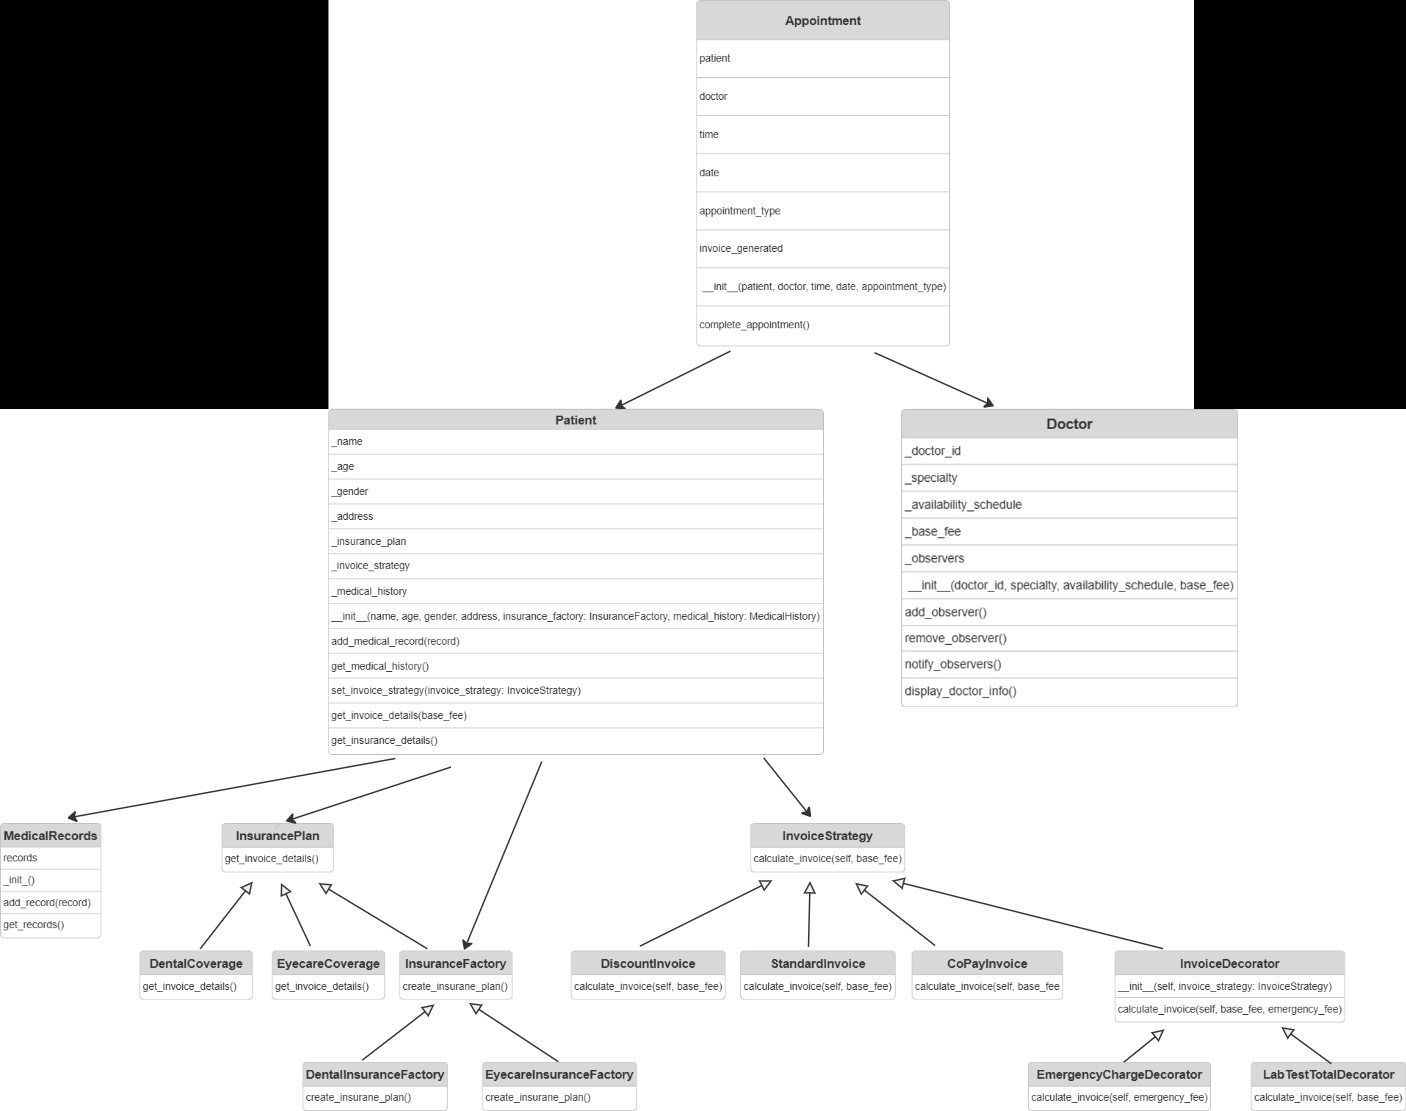

## Abstract Factory
The InsuranceFactory functions as an abstract base class that defines a method for creating insurance plans. 
Each insurance plan has specific characteristics. The abstract factory is chosen for this creation process, because different insurance plans are allowed to be instantiated, making it easier to add new insurance plans without impacting the system.
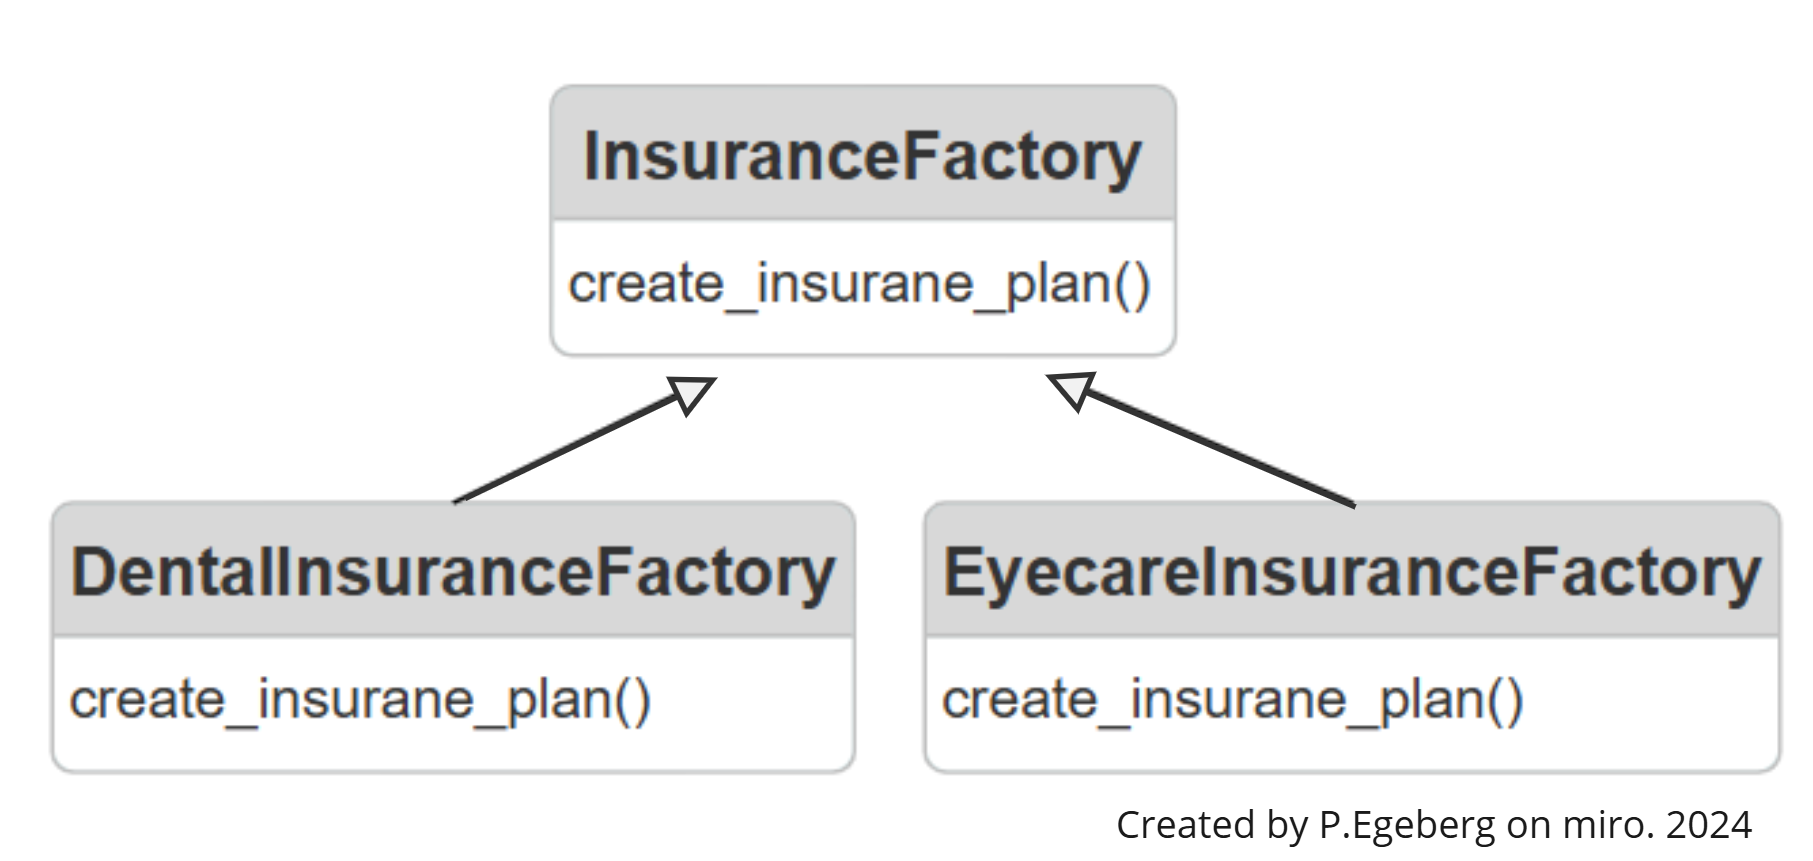

### Below is an abstract factory pattern for Insurance Plans:


In [1]:
from abc import ABC, abstractmethod #importing abstract base classes and abstractmethod to define abstract classes

class InsuranceFactory(ABC):
    @abstractmethod # defining an abstract method that each concrete factory needs to implement
    def create_insurance_plan(self): #this is the abstract method that the other sublclasses needs to implement
        pass

## Concrete Factories
Concrete factories, such as DentalInsuranceFactory and EyecareInsuranceFactory. Adding an additional Insurance is possible without modifying the existing code. This aligns with the Open/Closed Principle.

In [2]:
#the concrete factories 
class DentalInsuranceFactory(InsuranceFactory):
    def create_insurance_plan(self):  #implements the abstract method to create a dental insurance plan
        return DentalCoverage()
    
class EyecareInsuranceFactory(InsuranceFactory):
    def create_insurance_plan(self): #implemented from the abstract method from the insurance factory
        return EyecareCoverage()

## The Insurance Plan
The InsuranceFactory is the interface for creating insurance plans. DentalInsuranceFactory and EyecareInsuranceFactory provide concrete implementations for creating specific types of insurance plans. Both define its billing rules and benefits.
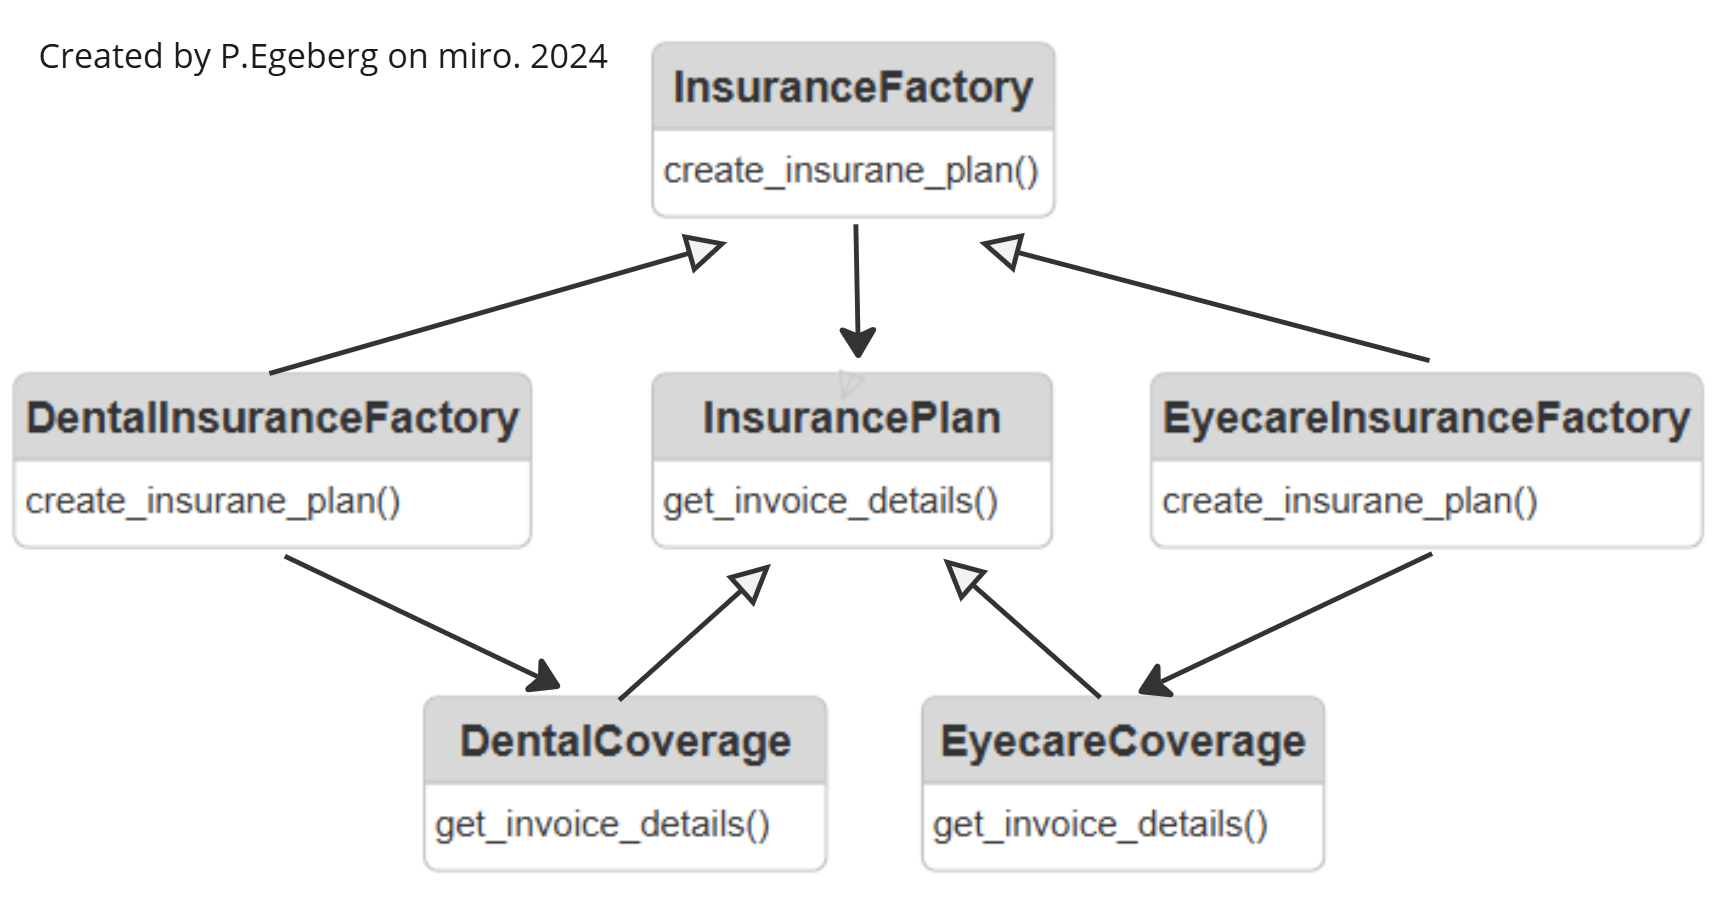

Like the "Sim-U-Duck"-behavior, this system can also have different insurance plans. 
The use of an InsuranceFactory ensures that the type of insurance plan, like dental and eyecare can vary without 
changing the rest of the system.

In [3]:
from abc import ABC, abstractmethod

class InsurancePlan(ABC): #abstract product with a default implementation through base implementation
    def get_invoice_details(self):
        return "Patient has basic insurance: "
    
class DentalCoverage(InsurancePlan): #concreting insurance plans
    def get_invoice_details(self):
        return super().get_invoice_details() + " 15% dental insurance discount."

class EyecareCoverage(InsurancePlan):
    def get_invoice_details(self):
        return super().get_invoice_details() + " kr 200 co-pay on eyecare appointments."
    
#the code is example is this:

dental_factory = DentalInsuranceFactory()
dental_plan = dental_factory.create_insurance_plan()
print(dental_plan.get_invoice_details()) 
print("-" * 75)
eyecare_factory = EyecareInsuranceFactory()
eyecare_plan = eyecare_factory.create_insurance_plan()
print(eyecare_plan.get_invoice_details())



Patient has basic insurance:  15% dental insurance discount.
---------------------------------------------------------------------------
Patient has basic insurance:  kr 200 co-pay on eyecare appointments.


## Strategy 

Importing abstract base classes and abstractmethod to define abstract classes billing strategies called InvoiceStrategy.
Each subclass must implement the calculate_invoice method to define a specific billing rule. It provides flexibility in how bills are calculated based on patient insurance and appointment types. The InvoiceStrategy class is an abstract base class with a method calculate_bill() that concretes strategies, such as StandardInvoice, DiscountInvoice, and CoPayInvoice. They are implemented to define specific billing behaviors. 
By using this approach, new bill strategies can be introduced without shifting any code in patient or appointment. 
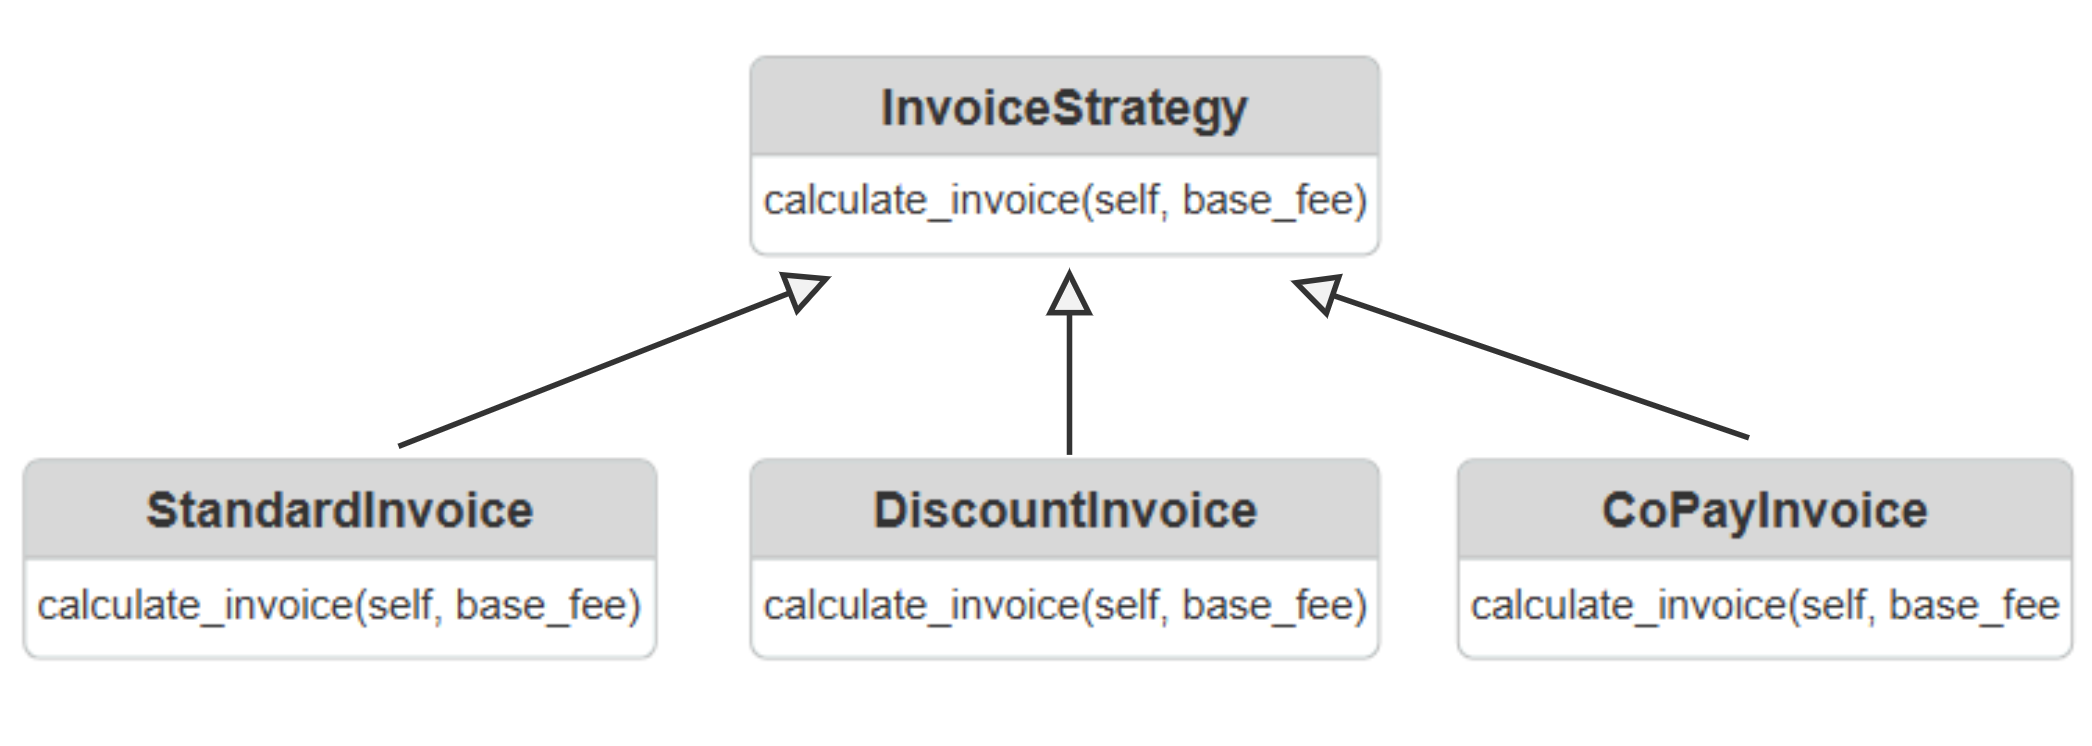

In [4]:
from abc import ABC, abstractmethod #import abstract base class and abstractmethod to define the abstract class

class InvoiceStrategy(ABC): # strategy pattern for billing rules
    @abstractmethod 
    def calculate_invoice(self, base_fee): #abstract method to calculate the total invoice
        pass

### Concrete Strategies
Concrete strategy for standard invoice, discount invoice and co-pay:

In [5]:
class StandardInvoice(InvoiceStrategy):
    def calculate_invoice(self, base_fee):
        return f"Standard billing with base cost: {base_fee}."

class DiscountInvoice(InvoiceStrategy):
    def calculate_invoice(self, base_fee):
        return f"Discount fee of {base_fee}."

class CoPayInvoice(InvoiceStrategy):
    def calculate_invoice(self, base_fee):
        return f"Co-pay fee of {base_fee}."

### Invoice Factor:

In [6]:
class InvoiceFactor:
    def __init__(self, strategy: InvoiceStrategy):
        self.strategy = strategy

    def generate_invoice(self, base_fee):
        return self.strategy.calculate_invoice(base_fee)

## Example Invoice

Below is an example usage of strategy for standard, discount and co-pay:

In [7]:
base_fee = 700
discount_fee = 200
copay_fee = 100

standard_invoice = InvoiceFactor(StandardInvoice())
print(standard_invoice.generate_invoice(base_fee))

discount_invoice = InvoiceFactor(DiscountInvoice())
print(discount_invoice.generate_invoice(discount_fee))

copay_invoice = InvoiceFactor(CoPayInvoice())
print(copay_invoice.generate_invoice(copay_fee))


Standard billing with base cost: 700.
Discount fee of 200.
Co-pay fee of 100.


## Medical History

The MedicalHistory class is a minimalistic implementation for managing a patient's medical history. It is designed to handle only two basic operations: adding records to a list and retrieving them. The records are returned in the order they were added, so this class serves as a chronological log of a patient's medical events.

The simplicity of this implementation makes it easy to use and extend in the future. However, it doesn't validate or structure the records, which could be a limitation if you need to categorize the history in detail. For now, it's a lightweight and functional solution for basic medical history management.

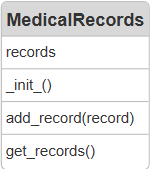

In [8]:
class MedicalHistory:
    def __init__(self):
        self.records = []
    
    def add_record(self, record):
        self.records.append(record)
    
    def get_records(self):
        return self.records

## Example Medical History

A medical history in the context of the provided code is to organize the patient's information for past medical events, diagnoses, treatments, and follow-ups. MedicalHistory class stores a list of health-related records for a patient.

For this example usage, the if __name__ == "__main__" for testing code effictively:

In [9]:
if __name__ == "__main__": #printing example of medical history
    patient_history = MedicalHistory()
    patient_history.add_record("Diagnosed with ear infection on:        2024-12-01.")
    patient_history.add_record("Prescribed medication for:              ear infection.")
    patient_history.add_record("Last knee surgery:                      2024-11-05.")
    print("Patient's Medical Records:")
    print("-" * 60) #line to split sections for clarity
    for record in patient_history.get_records():
        print(record)
    print("-" * 60)

Patient's Medical Records:
------------------------------------------------------------
Diagnosed with ear infection on:        2024-12-01.
Prescribed medication for:              ear infection.
Last knee surgery:                      2024-11-05.
------------------------------------------------------------


## Decorator Pattern
The Decorator Pattern is used to add extra billing charges LabTestTotalDecorator, EmergencyTotalDecorator without modifying the existing code.  This pattern makes it extensible by adding new features that can be layered on top of the existing billing strategies. The code doesn't perform any real billing calculations or track real data, but instead simulates interactions and behaviors in a way that shows the potential benefits of OO design. 

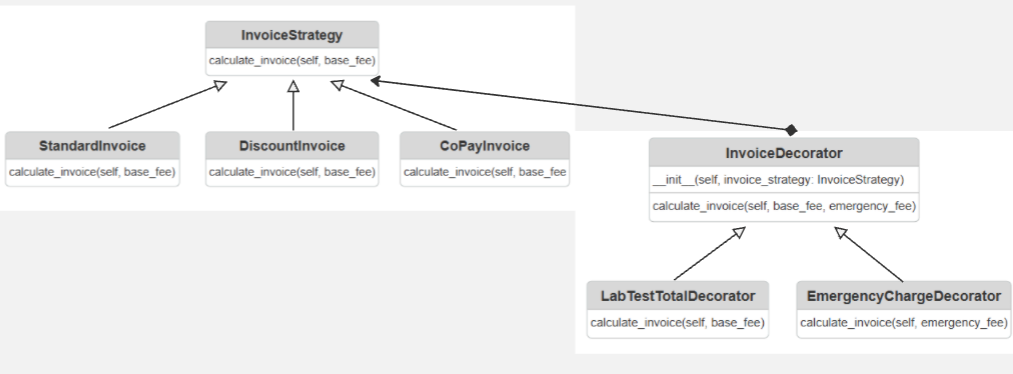


In [10]:
#additional cost with decorator pattern....

class InvoiceDecorator(InvoiceStrategy): #this class is an abstract base class that wraps InvoiceStrategy
    def __init__(self, invoice_strategy: InvoiceStrategy):
        self._invoice_strategy = invoice_strategy

    @abstractmethod
    def calculate_invoice(self, base_fee, emergency_fee):
        pass


## Concrete decorators
Concrete decorators like the LabTestTotalDecorator and the EmergencyChargeDecorator extend BillDecorator and 
add their respective charges.

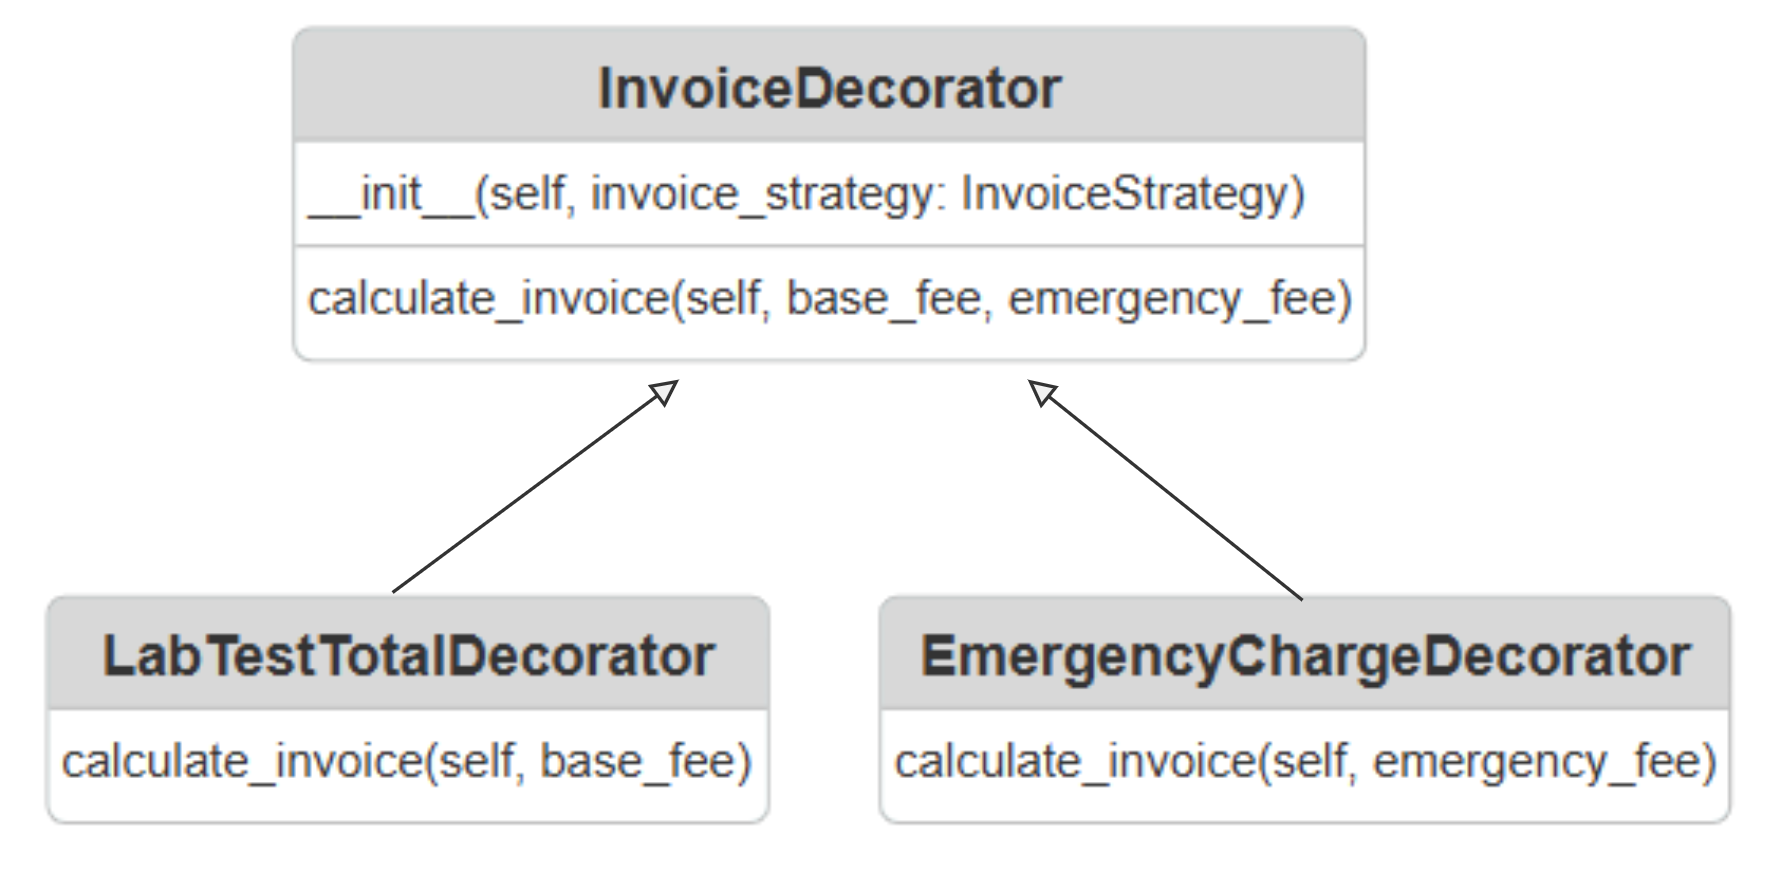

In [11]:
class LabTestTotalDecorator(InvoiceDecorator):
    def calculate_invoice(self, base_fee): #lab test information to the base_fee
        return f"{self._invoice_strategy.calculate_invoice(base_fee)} Additional lab test cost added."

class EmergencyChargeDecorator(InvoiceDecorator):
    def calculate_invoice(self, emergency_fee):#emergency charge information 
        return f"{self._invoice_strategy.calculate_invoice(emergency_fee)} Emergency service cost added."

## Example code Decorator

In [12]:
# Example usage
if __name__ == "__main__":
    base_fee = 500
    emergency_fee = 100
    print("-" * 80)
    print("*** Lab Test Cost ***\n")
    standard_invoice = StandardInvoice()
    lab_test_invoice = LabTestTotalDecorator(standard_invoice)
    print(lab_test_invoice.calculate_invoice(base_fee))
    print("-" * 80)
    print("-" * 80)
    print("-" * 80)
    print("*** Invoice with discount ***\n")
    discount_invoice = DiscountInvoice()
    lab_test_with_discount = LabTestTotalDecorator(discount_invoice)
    emergency_with_lab_and_discount = EmergencyChargeDecorator(lab_test_with_discount)
    print(emergency_with_lab_and_discount.calculate_invoice(emergency_fee))
    print("-" * 80)

--------------------------------------------------------------------------------
*** Lab Test Cost ***

Standard billing with base cost: 500. Additional lab test cost added.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
*** Invoice with discount ***

Discount fee of 100. Additional lab test cost added. Emergency service cost added.
--------------------------------------------------------------------------------


# The core entities
Appointment serves as a primary center, connecting patients and doctors and organizing schedule details. Patient encompasses insurance, billing, and medical history while interacting with the InsurancePlan and the subclasses of InvoiceStrategy. Doctor uses the Observer Pattern to handle alerts efficiently. Together, these components form a scalable and extensible platform for managing healthcare procedures.
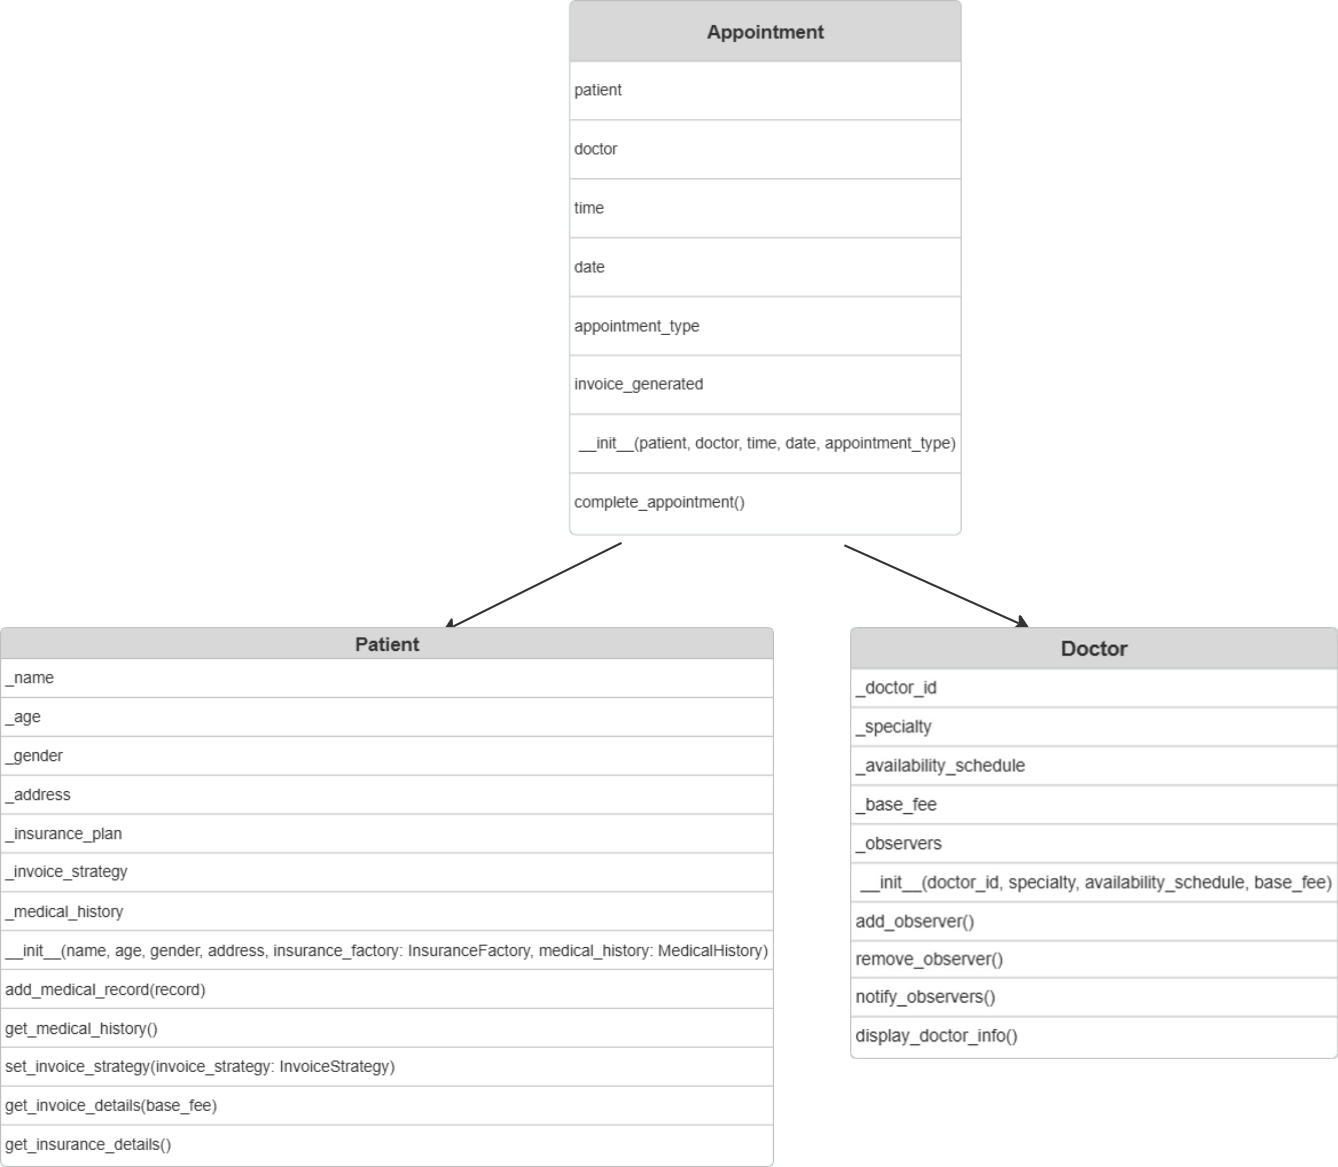

## Class Patient

Encapsulation of attributes ensures that sensitive data is protected. Access to class properties is controlled. The attribute _medical_history is made private, with specific methods provided to add and retrieve records. Other attributes such as _name, _age, _gender, _address, _insurance_plan, and _invoice_strategy are also encapsulated as private and are exposed using @property. 
The name setter ensures that the value provided is non-empty. The age setter validates that it is positive. The address setter ensures that it is not left blank. These safeguards help maintain consistency and prevent invalid data from being introduced into the system. Properties like gender and insurance_plan, are made “read only” since these values typically do not change after the object is initialized. By using @property, the system provides a consistent interface for accessing and modifying attributes. 

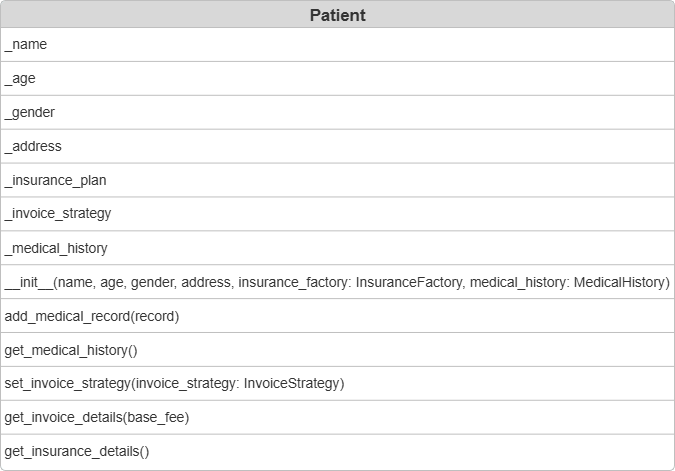

In [13]:
class Patient:
    def __init__(self, name, age, gender, address, insurance_factory: InsuranceFactory, medical_history: MedicalHistory = None):
        self._name = name  
        self._age = age
        self._gender = gender
        self._address = address
        self._insurance_plan = insurance_factory.create_insurance_plan()
        self._invoice_strategy = StandardInvoice()  
        self._medical_history = medical_history if medical_history else MedicalHistory()
    
    #getters and setters for name, age:
    
    @property
    def name(self):
        return self._name
    @name.setter
    def name(self, value):
        if not value or not value.strip():
            raise ValueError("Unable. Please provide valid name.")
        self._name = value
    
    @property
    def age(self):
        return self._age
    @age.setter
    def age(self, value):
        if value <= 0:
            raise ValueError("Age must be a positive number.")
        self._age = value

    #read only getter for gender
    @property
    def gender(self):
        return self._gender

    #getter and setter for address
    @property
    def address(self):
        return self._address

    @address.setter
    def address(self, value):
        if not value or not value.strip():
            raise ValueError("Fill in valid address")
        self._address = value

    #read only
    @property
    def insurance_plan(self):
        return self._insurance_plan

    #getter and setter for invoice_strategy
    @property
    def invoice_strategy(self):
        return self._invoice_strategy

    @invoice_strategy.setter
    def invoice_strategy(self, value: InvoiceStrategy):
        self._invoice_strategy = value

    #adding medical record and getiing medical records
    def add_medical_record(self, record):
        self._medical_history.add_record(record)
    
    def get_medical_history(self):
        return self._medical_history.get_records()

    #setting invoice strategy:
    
    def set_invoice_strategy(self, invoice_strategy: InvoiceStrategy):
        self.invoice_strategy = invoice_strategy

    #getting the billing details and insurance details below:
    
    def get_invoice_details(self, base_fee):
        return self._invoice_strategy.calculate_invoice(base_fee)
    
    def get_insurance_details(self):
        return self._insurance_plan.get_invoice_details()



## Example Class Patient

The following simulates a patient management system that demonstrate polymorphism through using insurance plans, and billing. It creates a patient with a tooth ache and has a dental appointment. The patient has dental insurance plan and all the information is added in their medical records. It also generates a discount invoice for the dental procedure. Then, updates history about the patient's follow-up appointment. 


In [14]:
# Main Patient Example
if __name__ == "__main__":
    
    #create medical history for the patient
    
    print("\nAdding dental information in the patient's medical records.")
    print("-" * 80)
    medical_history = MedicalHistory() #encapsulating the list
    medical_history.add_record("Visited the dental clinic for a routine checkup on:    2023-03-01.")
    
    
    #this is THE patient who has excrutiating tooth ache
    
    patient = Patient(
        name="Amanda Rincon",
        age=35,
        gender="Female",
        address="123 Maple Street, 1929 Dekning",
        insurance_factory=DentalInsuranceFactory(), #create a insurance plan from here
        medical_history=medical_history) 
    print(f"Patient created:        {patient.name}\n", 
          f"Age:                    {patient.age}\n", 
          f"Gender:                 {patient.gender}\n", 
          f"Address:                {patient.address}\n")
    print("-" * 80)
    print(f"{patient.get_insurance_details()}\n")  #abstraction get_insurance_details()
    print("-" * 80)
    
    print("-" * 80)
    print("Dental Records:")
    for record in patient.get_medical_history():
        print(f" - {record}")
    print("-" * 80)
    
    #uses DiscountInvoice to get the bill
    
    patient.set_invoice_strategy(DiscountInvoice())
    print(f"New invoice for patient {patient.name}.")
    base_fee = 500  #fee for the dental procedure
    invoice_details = patient.get_invoice_details(base_fee)
    print("-" * 80)
    
    #adding another medical record for the same patient:
    
    print({patient.name}, "has a dentist appointment:")
    patient.add_medical_record("New appointment for cavities 2023-03-10.")
    print("\nUpdated Medical History:")
    for record in patient.get_medical_history():
        print(f"  - {record}")
    print("-" * 80)


Adding dental information in the patient's medical records.
--------------------------------------------------------------------------------
Patient created:        Amanda Rincon
 Age:                    35
 Gender:                 Female
 Address:                123 Maple Street, 1929 Dekning

--------------------------------------------------------------------------------
Patient has basic insurance:  15% dental insurance discount.

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Dental Records:
 - Visited the dental clinic for a routine checkup on:    2023-03-01.
--------------------------------------------------------------------------------
New invoice for patient Amanda Rincon.
--------------------------------------------------------------------------------
{'Amanda Rincon'} has a dentist appointment:

Updated Medical History:
  - Visited the dental clinic for a rout

## Observer Design Pattern
It uses the Observer Design Pattern to notify the other components if the certain properties change. Observers are external objects that want to be notified when certain changes occur in the Doctor class.


In [15]:
from abc import ABC, abstractmethod

class Observer(ABC):
    @abstractmethod
    def update(self, message): #handles updates
        pass


## The Doctor 

The doctor acts as the subject and maintains a list of observers that notifies if any changes occure. These observers reacts to updates from the subject, such as changes in the doctor's fee, specialty, or schedule.

The Doctor class acts is the core here, since it keeps track of the observers in a private list. It allows to add and remove them dynamically. Whenever a significant property of the doctor changes, such as the base fee, the notify_observers method sends out an update to all registered observers. This ensures that all observers stay in sync with the doctor's current state without tightly coupling them to the Doctor class itself.

To manage changes to the doctor's attributes, you used property setters and getters, just to enforce the encapsulation. So if base_fee get updated by using the setter, it doesn’t just change the value. It just triggers the observer notifications, and the logic for managing updates to notify observers is easy to maintain.

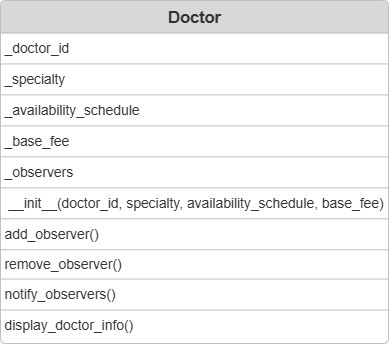

In [16]:
class Doctor:
    def __init__(self, doctor_id, specialty, availability_schedule, base_fee=None):
        self.__doctor_id = doctor_id
        self.__specialty = specialty
        self.__availability_schedule = availability_schedule
        self.__base_fee = base_fee  #no default value
        self.__observers = []  #handles list of observers
    
    #getter for doctor_id
    @property
    def doctor_id(self):
        return self.__doctor_id

    #getter and setter for specialty, availability_schedule, base_fee
    
    @property
    def specialty(self):
        return self.__specialty
    @specialty.setter
    def specialty(self, value):
        self.__specialty = value
        self.notify_observers(f"The doctor has changed specialty to {self.__specialty}.")

    @property
    def availability_schedule(self):
        return self.__availability_schedule
    @availability_schedule.setter
    def availability_schedule(self, value):
        self.__availability_schedule = value
        self.notify_observers(f"Updated availability:  {self.__availability_schedule}.")

    @property
    def base_fee(self):
        return self.__base_fee
    @base_fee.setter
    def base_fee(self, value):
        if value is None or value > 0:
            self.__base_fee = value
            self.notify_observers(f"New prices are now: {self.__base_fee}.")
        else:
            raise ValueError("Invalid details. Please updated a valid number.")

    #observers:
    
    def add_observer(self, observer):
        if observer not in self.__observers:
            self.__observers.append(observer)

    def remove_observer(self, observer):
        if observer in self.__observers:
            self.__observers.remove(observer)

    def notify_observers(self, message):
        for observer in self.__observers:
            observer.update(message)

    #show the doctor
    
    def display_doctor_info(self):
        return (
            f"Doctor ID: {self.__doctor_id}\n"
            f"Specialty: {self.__specialty}\n"
            f"Availability: {self.__availability_schedule}\n"
            f"Base Fee: {self.__base_fee}")


## Doctor observer
Creating a DoctorObserver that inherits from base class Observer, would ensure all observer classes follows the same structure by implementing the update method. This allows observers to be added or removed. It ensures they react to changes in the subject’s state, while keeping the subject and observers loosely coupled. 


In [17]:
class DoctorObserver:
    def __init__(self, name):
        self.name = name

    def update(self, message):
        print(f"{self.name} has a new update: {message}")


## Example use of doctor

The Doctor class can be reused without worrying about the specific details of how its observers handle updates. By relying on polymorphism, the design promotes clean and efficient interaction between different objects, making it a strong example of object-oriented principles in action.

In [18]:
# create a doctor

doctor = Doctor(doctor_id=123, specialty="Dermatology", availability_schedule="Mon-Fri, 9am-3pm", base_fee= 800)

# add observers

observer1 = DoctorObserver("Trinidad Department")
doctor.add_observer(observer1)
print("-------------------------------------------------------------")

#show dr info

print(doctor.display_doctor_info())
print("---------------------------------------------------------------")

#dr shifts specialty with a new fee

doctor.specialty = "Plastic Surgery"
doctor.availability_schedule = "Tue-Thu, 10am-5pm"
doctor.base_fee = 500
print("-------------------------------------------------------------")
print(doctor.display_doctor_info())
print("-------------------------------------------------------------")



-------------------------------------------------------------
Doctor ID: 123
Specialty: Dermatology
Availability: Mon-Fri, 9am-3pm
Base Fee: 800
---------------------------------------------------------------
Trinidad Department has a new update: The doctor has changed specialty to Plastic Surgery.
Trinidad Department has a new update: Updated availability:  Tue-Thu, 10am-5pm.
Trinidad Department has a new update: New prices are now: 500.
-------------------------------------------------------------
Doctor ID: 123
Specialty: Plastic Surgery
Availability: Tue-Thu, 10am-5pm
Base Fee: 500
-------------------------------------------------------------


## APPOINTMENT
Appointment Class encapsulates appointment related information. It provides methods to complete the appointment.
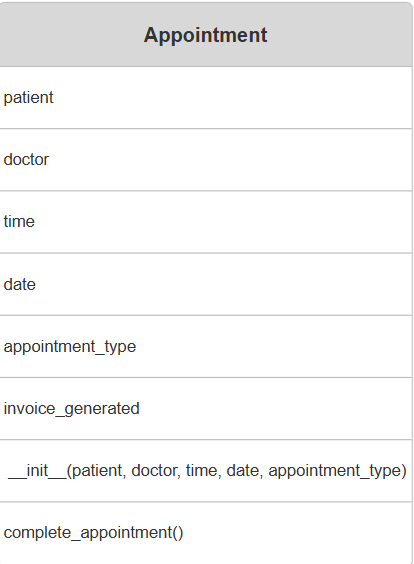

In [19]:
class Appointment:
    def __init__(self, patient, doctor, time, date, appointment_type):
        if not isinstance(patient, Patient): #make sure it is patient / doctor and time
            raise TypeError("must be Patient")
        if not isinstance(doctor, Doctor):
            raise TypeError("must be Doctor")
        if not time or not date or not appointment_type:
            raise ValueError("provide time and date")
        
        self.patient = patient
        self.doctor = doctor
        self.time = time
        self.date = date
        self.appointment_type = appointment_type
        self.invoice_generated = False
    
    #make the bill when appointment is completed
    def complete_appointment(self):
        if self.doctor.base_fee is None:
            raise ValueError("Doctor's base fee is not ready.")
        bill_amount = self.patient.get_invoice_details(self.doctor.base_fee)
        self.invoice_generated = True
        print(f"Appointment completed. The amount is: {bill_amount}")


## Appointment example

In [20]:
print("-" * 80)
doctor = Doctor(doctor_id=101, specialty="Dermatologist", availability_schedule="Mon-Fri, 10am-4pm")
doctor.base_fee = 200  #doctors fee
patient = Patient(name="Michael Neerman", age=30, gender="Male", address="123 Main St, 2023 Madeira", insurance_factory=DentalInsuranceFactory())

#this is the appointment section:

appointment = Appointment(
    patient=patient,
    doctor=doctor,
    time="10:00 AM",
    date="2024-12-10",
    appointment_type="Consultation")

#show appointment 

print(f"APPOINTMENT FOR:\nPatient:               {patient.name}\nScheduled doctor is:   {doctor.specialty}\n"
      f"Time:                  {appointment.time}\nDate:                  {appointment.date}\nType:                  {appointment.appointment_type}")
print("-" * 80)
#completing the appointment and generate the invoice
appointment.complete_appointment()
print("-" * 80)


--------------------------------------------------------------------------------
APPOINTMENT FOR:
Patient:               Michael Neerman
Scheduled doctor is:   Dermatologist
Time:                  10:00 AM
Date:                  2024-12-10
Type:                  Consultation
--------------------------------------------------------------------------------
Appointment completed. The amount is: Standard billing with base cost: 200.
--------------------------------------------------------------------------------


# Extension

Here's how to extend the system to add new telehealth consultation and wellness program while keeping the rest of the system unaffected. This demonstrates the power of the design patterns like the Sim-U-Duck example. 

In the following sections are codes that create a new strategy class for telehealth billing. It implements the existing InvoiceStrategy interface and change the billing strategy of a patient to TelehealthInvoice.

Adding a wellness program insurance plan and defining it as well as the medical insurance, by creating a new factory following the InsuranceFactory interface. It implements the InsurancePlan interface for a new plan.

Nurse is also added for demontstrating the extension of Doctor. Other healthcare providers could be extended this way.

In [21]:
class TelehealthInvoice(InvoiceStrategy):
    def calculate_invoice(self, base_fee):
        discounted_fee = base_fee 
        return f"Final fee: {discounted_fee}."
    
class WellnessInsuranceFactory(InsuranceFactory):
    def create_insurance_plan(self):
        return WellnessCoverage()

class WellnessCoverage(InsurancePlan):
    def get_invoice_details(self):
        return "The patient has wellness insurance with 10% discount."

'''EXTENTSION FOR NURSE'''

class Nurse:
    def __init__(self, nurse_id, specialty, availability_schedule, base_fee=None):
        self.__nurse_id = nurse_id
        self.__specialty = specialty
        self.__availability_schedule = availability_schedule
        self.__base_fee = base_fee  #no default value
        self.__observers = []  #handles list of observers
    
    #getter for doctor_id
    
    @property
    def nurse_id(self):
        return self.__nurse_id

    #getter and setter for specialty, availability_schedule, base_fee
    
    @property
    def specialty(self):
        return self.__specialty
    @specialty.setter
    def specialty(self, value):
        self.__specialty = value
        self.notify_observers(f"Nurse has been assigned to {self.__specialty}.")

    @property
    def availability_schedule(self):
        return self.__availability_schedule
    @availability_schedule.setter
    def availability_schedule(self, value):
        self.__availability_schedule = value
        self.notify_observers(f"Updated availability:  {self.__availability_schedule}.")

    #observers:
    
    def add_observer(self, observer):
        if observer not in self.__observers:
            self.__observers.append(observer)

    def remove_observer(self, observer):
        if observer in self.__observers:
            self.__observers.remove(observer)

    def notify_observers(self, message):
        for observer in self.__observers:
            observer.update(message)

    #show the nurse
    
    def display_nurse_info(self):
        return (
            f"Nurse ID: {self.__nurse_id}\n"
            f"Specialty: {self.__specialty}\n"
            f"Availability: {self.__availability_schedule}\n")
        

'''EXTENSION FOR MEDCALINSURANCE'''

class MedicalInsuranceFactory(InsuranceFactory):
    def create_insurance_plan(self): #implemented from the abstract method from the insurance factory
        return MedicalCoverage()

class MedicalCoverage(InsurancePlan):
    def get_invoice_details(self):
        return super().get_invoice_details() + " kr 500 co-pay on medical appointments."



# Example Extension

In [22]:
if __name__ == "__main__":
    print("-" * 80)
    print("*** Creating a patient with Wellness Insurance. ***")
    wellness_patient = Patient("Alex Javier", 40, "Non-binary", "789 Oak St 3222 Alkmaar", WellnessInsuranceFactory())
    print(f"\nPatient created: {wellness_patient.name}, \nInsurance: {wellness_patient.get_insurance_details()}")
    print("-" * 80)
    
    #billing for the patient
    
    wellness_patient.set_invoice_strategy(TelehealthInvoice())
    print("His insurance can be used for Telehealth.")

    #Mr.Javier wants to use his wellness insurance to his telehealth appointment.
    
    print("Creating a telehealth appointment for the Alex Javier.")
    doctor = Doctor(2, "General Practitioner", "Mon-Fri, 10am-4pm")
    telehealth_appointment = Appointment(
        wellness_patient, doctor, "1:00 PM", "2024-12-12", "telehealth")
    print(f"Telehealth appointment created: Date {telehealth_appointment.date}, Time {telehealth_appointment.time}")
    print("-" * 80)
    
    #put this in the patients medical record
    
    print("Add a medical record for", wellness_patient.name)
    print("-" * 80)
    wellness_patient.add_medical_record("Talked to a General Practitioner and the nurse on 2024-12-12")
    print("Medical record added.")
    print("-" * 80)
    medical_history = wellness_patient.get_medical_history()
    for record in medical_history:
        print(f"Record: {record}")
        
    # put in the nurse
    print("-" * 80)
    nurse = Nurse(nurse_id=233, specialty="Midwife", availability_schedule="Mon-Fri, 9am-3pm", base_fee= 800)
    print(nurse.display_nurse_info())
    print("-" * 80)
    medical_factory = MedicalInsuranceFactory()
    medical_plan = medical_factory.create_insurance_plan()
    print(medical_plan.get_invoice_details())
    print("-" * 80)


--------------------------------------------------------------------------------
*** Creating a patient with Wellness Insurance. ***

Patient created: Alex Javier, 
Insurance: The patient has wellness insurance with 10% discount.
--------------------------------------------------------------------------------
His insurance can be used for Telehealth.
Creating a telehealth appointment for the Alex Javier.
Telehealth appointment created: Date 2024-12-12, Time 1:00 PM
--------------------------------------------------------------------------------
Add a medical record for Alex Javier
--------------------------------------------------------------------------------
Medical record added.
--------------------------------------------------------------------------------
Record: Talked to a General Practitioner and the nurse on 2024-12-12
--------------------------------------------------------------------------------
Nurse ID: 233
Specialty: Midwife
Availability: Mon-Fri, 9am-3pm

-------------

# Simulation Prototype for HealthyLife Healthcare

This prototype demonstrates how Object-Oriented design can be used to make a healthcare system that is flexible and extensible.
This extended simulation demonstrates how new billing, insurance plans, and other design patterns can be seamlessly integrated into the system.


In [23]:
if __name__ == "__main__":
    print("-" * 80)
    #create a patient
    
    print("Creating a patient....\n")
    medical_history_instance = MedicalHistory()
    medical_history_instance.add_record("Previous diagnosis: Asthma in 2020")
    patient = Patient("Albertje van Gelderen", 32, "Female", "456 Voor Stadt - 98837 WA", MedicalInsuranceFactory(), medical_history_instance)
    print(f"Patient created:    {patient.name}\n"
          f"Age:                {patient.age}\n" 
          f"Gender:             {patient.gender}\n" 
          f"Address:            {patient.address}\n")
    print(f"{patient.get_insurance_details()}")
    print("-" * 80)
    print("Existing Medical History: \n")
    for record in patient.get_medical_history():
        print(f"{record}")
    print("-" * 80)
    
    #create a doctor with observer pattern 
    
    print("Creating a doctor and nurse....\n")
    doctor = Doctor(doctor_id=1, specialty="Cardiology", availability_schedule="Mon-Fri 9am-5pm")
    nurse = Nurse(nurse_id=12, specialty="District Nurse", availability_schedule="Mon-Fri 9am-5pm")
    doctor.base_fee = 200  # Set a valid base fee
    observer1 = DoctorObserver("Observer 1")
    observer2 = DoctorObserver("Observer 2")
    doctor.add_observer(observer1)
    doctor.add_observer(observer2)
    print(f"Doctor created:     unique_id{doctor.doctor_id}\n"
          f"Specialty:          {doctor.specialty}\n"
          f"Availability:       {doctor.availability_schedule}")
    print("-" * 80)
    print(f"Nurse created:     unique_id{nurse.nurse_id}\n"
          f"Specialty:          {nurse.specialty}\n"
          f"Availability:       {nurse.availability_schedule}")
    print("-" * 80)
    
    # create an appointment
    
    print("Creating an appointment...\n")
    appointment = Appointment(patient, doctor, "10:00 AM", "2023-03-15", "in-person")
    print(f"Appointment created for patient:     {patient.name}\n"
          f"Date:                                {appointment.date}\n"
          f"Time:                                {appointment.time}\n"
          f"Type:                                {appointment.appointment_type}")
    print("-" * 80)
    
    #add a medical record to patient history
    
    print("Adding a medical record for the patient...\n")
    patient.add_medical_record("Diagnosed with hypertension on 2023-03-15")
    print(f"Medical record added for patient:    {patient.name}\n"
          f"\nDiagnosed with hypertension on 2023-03-15")
    print("-" * 80)

    print(f"Lab Test Charges applied for patient {patient.name}.")
    print("-" * 80)
    
    #create another appointment and generate the updated bill
    
    print("Creating another appointment and updating the bill...\n")
    appointment2 = Appointment(patient, doctor, "11:00 AM", "2023-03-16", "virtual")
    print(f"Appointment created for patient:     {patient.name}\n"
          f"Date:                                {appointment2.date}\n"
          f"Time:                                {appointment2.time}\n"
          f"Type:                                {appointment2.appointment_type}\n")
    appointment2.complete_appointment()
    print("-" * 80)

    #view patient's medical history
    
    medical_history = patient.get_medical_history()
    print(f"Medical history for patient {patient.name}:")
    for record in medical_history:
        print(f"  - {record}")
    print("-" * 80)
    print("*" * 80)
    print("-" * 80)
    print("*" * 80)
    print("-" * 80)
    
    #create a new patient with 
    
    print("\nA new patient with wellness insurance...\n")
    wellness_patient = Patient("Alexander Andersen", 40, "Non-binary", "789 Oak St", WellnessInsuranceFactory())
    print(f"Patient created:    {wellness_patient.name}\n" 
          f"Insurance:          {wellness_patient.get_insurance_details()}\n")
    print(wellness_patient.name, "can only use this insurance for physiotherapy" )
    print("-" * 80)

    #the patient wants to get a Telehealth appointment 
    
    telehealth_appointment = Appointment(wellness_patient, doctor, "1:00 PM", "2024-12-12", "telehealth")
    print(wellness_patient.name, "has a telehealth appointment with nurse: \n")
    print(f"Specialty:          {nurse.specialty}\n"
          f"Availability:       {nurse.availability_schedule}")
    print(f"Date:               {telehealth_appointment.date}\n" 
          f"Time:               {telehealth_appointment.time}")
    print("-" * 80)
    
    #complete the telehealth appointment
    
    print("Completing the telehealth appointment and print the bill.")
    print("-" * 80)
    telehealth_appointment.complete_appointment()
    print("-" * 80)

--------------------------------------------------------------------------------
Creating a patient....

Patient created:    Albertje van Gelderen
Age:                32
Gender:             Female
Address:            456 Voor Stadt - 98837 WA

Patient has basic insurance:  kr 500 co-pay on medical appointments.
--------------------------------------------------------------------------------
Existing Medical History: 

Previous diagnosis: Asthma in 2020
--------------------------------------------------------------------------------
Creating a doctor and nurse....

Doctor created:     unique_id1
Specialty:          Cardiology
Availability:       Mon-Fri 9am-5pm
--------------------------------------------------------------------------------
Nurse created:     unique_id12
Specialty:          District Nurse
Availability:       Mon-Fri 9am-5pm
--------------------------------------------------------------------------------
Creating an appointment...

Appointment created for patient:     Al

## DISCUSSIONS

The healthcare management system demonstrates object-oriented principles and design patterns. This task simulates the benefits of object-oriented design and patterns. 

Strategy was chosen to separate billing from the core patient functionality. However calculating the billing cannot be performed and cannot be integrated with databases. It uses text-based outputs to highlight key patterns and principles rather than showcasing operational complexities. While it demonstrates the fundamentals of object-oriented principles, it is not equipped to handle multiple patients, doctors, or appointments in a persistent environment. Managing various insurance plans for a single patient or implementing tiered consultation fees, are not addressed, as they fall beyond the educational objectives of this system. 

Introducing new attributes in the Patient or Doctor may need changes in the Appointment class. Abstract classes can reduce dependency, by creating a Person interface for both the Patient and Doctor. The Appointment class can interact with abstraction instead of concrete implementations. This approach decouples the classes, making them evolve independently. It would be easier to add nurses, therapists, counselors, and other healthcare providers.

Potential challenges may arise related to scalability, because it may be harder to scale the code system. Tight coupling happens when classes become very dependent on one another. This can make the system more fragile. The Appointment class could become reliant on these changes, and lead to frequent system updates. Observer Pattern is a powerful mechanism for notifying components as the state changes. As the number of observers grows, the notification system may encounter performance issues, like excessive notifications. In a real-world healthcare system, frequent updates to doctors’ availability could overwhelm the observers, and lead to a less efficient system. Addressing the scalability concerns, priorities should be implemented, so that critical notifications are processed first. It can also be structured to gather different updates into a single notification. 

Decorator pattern allows for dynamic extension of invoice functionality by adding charges for lab tests or emergency fees. Maintaining order can be challenging, especially if multiple decorators are added. For instance, applying a discount decorator before or after an emergency fee decorator might yield different results, creating inconsistencies. A clear priority mechanism for combining decorators should be established. Invoice strategies define how billing calculations are performed based on specific rules. While the Strategy pattern simplifies new billing strategies, introducing new classes in Invoice Strategy might require updating patient code. This could lead to code duplication. However, it can be useful to create factory patterns instead. It is shown that patterns like Strategy and Factory can be flexible.

It is important to know the challenges ahead. A hospital system that grows and thrives on change requires a sturdy system design. By creating interfaces that meet the flexibility of the growing demands without toppling over. Prioritizing tasks that need attention without overwhelming the staff. Object-oriented principles can be a good solution because they are not built just to function but to flourish in the unpredictable and evolving landscape of modern medicine.

The text-based nature of the system is not a limitation but aligns with showcasing the foundational interactions between classes without having overwhelming features. Demonstrating design patterns can that adapt to new requirements with minimal changes. 

# CONCLUSION

To summarize, HealthyLife Healthcare design is an educational tool that demonstrates how object-oriented ideas and patterns may be utilized to create adaptable, manageable, and extensible systems. The main purpose is to explain the structural foundations of object-oriented programming. The limits reflect this objective and emphasize conceptual clarity and simplicity. It has the limitations of real-world complications. This system emphasizes adaptability and future-proofing, provides a solid foundation for understanding how object-oriented systems can be developed for extensibility and modularity. Even if it doesn't include all of the features and functionalities of a practical healthcare management system.

